Digite a data inicial no formato yyyy-mm-dd: 2019-04-01
Digite a data final no formato yyyy-mm-dd: 2019-04-30
Período selecionado: 2019-04-01 a 2019-04-30


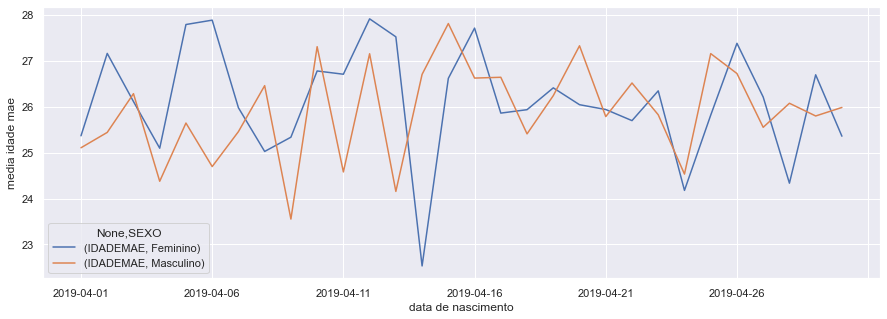

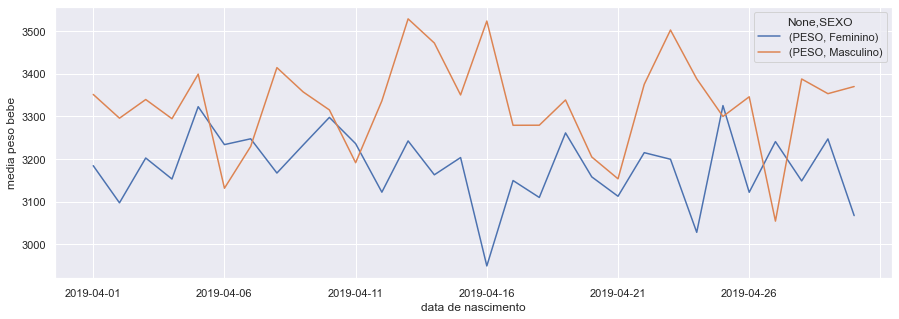

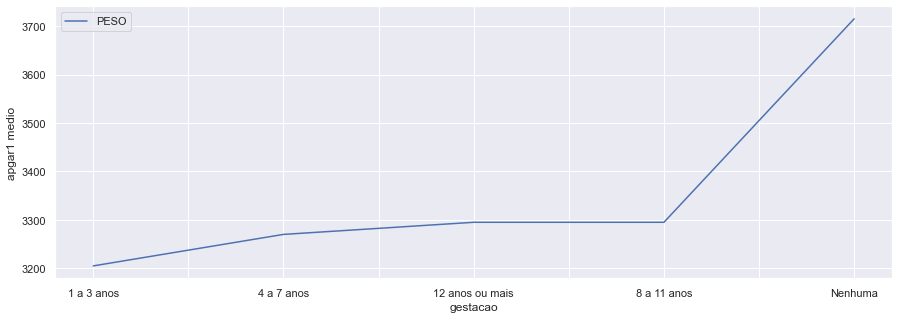

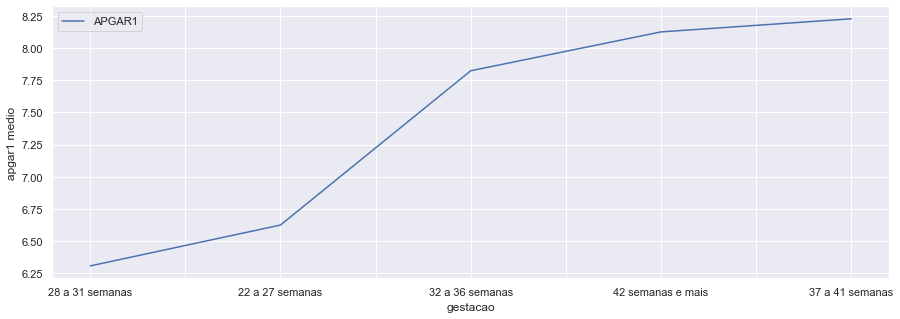

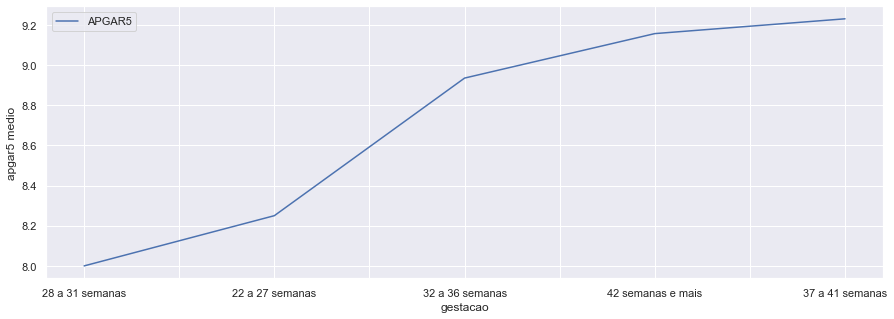

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

df = pd.read_csv('SINASC_RO_2019.csv')

start_date = str(input('Digite a data inicial no formato yyyy-mm-dd: '))
end_date = str(input('Digite a data final no formato yyyy-mm-dd: '))
mask = (df['DTNASC'] >= start_date) & (df['DTNASC'] <= end_date)
sinasc = df.loc[mask]


max_data = sinasc.DTNASC.max()[:7]
#print(max_data)
print('Período selecionado: '+sinasc.DTNASC.min()+' a '+sinasc.DTNASC.max())

os.makedirs('./output/figs/'+max_data, exist_ok=True)

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

### Conclusão
- A fim de garantir uma maior autonomia na geração dos gráficos o código foi adaptado para que o usuário inserisse o período desejado para análise através de um input de data inicial e final;
- Também foi utilizado a base completa de 2019, a "SINASC_RO_2019.csv", facilitando assim a automação do código.